Chủ đề T8: **Khai thác mối quan hệ Cấu trúc – Hoạt tính (Structure–Activity Relationships, SAR)** là một trong những trụ cột quan trọng nhất trong nghiên cứu và phát triển thuốc hiện đại. Dưới đây là phân tích chi tiết song ngữ, mô hình xử lý, hướng dẫn và ví dụ thực hành.

---

## 🧪 1. Phân tích chủ đề | Topic Analysis

**Tiếng Việt:**
Mối quan hệ cấu trúc – hoạt tính (SAR) nhằm hiểu cách thay đổi cấu trúc phân tử ảnh hưởng đến hoạt tính sinh học của nó. Phân tích SAR giúp phát hiện phần tử chức năng, xác định nhóm dược lý quan trọng và thiết kế phân tử hiệu quả hơn.

**English:**
Structure–Activity Relationship (SAR) explores how molecular structural changes influence biological activity. SAR analysis is vital for identifying functional moieties, pharmacophore groups, and optimizing molecules for drug-like behavior.

---

## 🧬 2. Mô hình phân tích SAR | SAR Analysis Workflow

1. **Truy vấn dữ liệu hoạt tính từ ChEMBL** (IC50, EC50, etc.)
2. **Tính toán mô tả phân tử (molecular descriptors)** bằng RDKit.
3. **Khảo sát sự biến thiên hoạt tính theo thay đổi cấu trúc**.
4. **Vẽ biểu đồ so sánh và phân tích thống kê** (correlation, boxplot).
5. **Lọc hoặc nhóm hợp chất dựa vào đặc tính SAR**.

---

## 📝 3. Hướng dẫn kỹ thuật | Technical Instructions

* **Yêu cầu:** PostgreSQL + RDKit, pandas, matplotlib
* **Dữ liệu tải từ PostgreSQL, lưu dưới `../data/T8_sar_data.csv`**
* **Jupyter Notebook lưu dưới `notebook/T8_1_sar_exploration.ipynb`**

---

## 🧾 4. SQL + Python Code Snippets (Tiếng Anh)

### ✅ Example 1: Truy vấn dữ liệu hoạt tính

```sql
-- T8_1_sar_query.sql
SELECT mol.molregno, mol.canonical_smiles, act.standard_value AS ic50_nm
FROM compound_structures AS mol
JOIN activities AS act ON mol.molregno = act.molregno
WHERE act.standard_type = 'IC50'
  AND act.standard_units = 'nM'
  AND act.standard_value ~ '^[0-9\.]+$'
  AND act.standard_relation = '='
LIMIT 100;
```

> ⚠️ Fix lỗi `~` bằng cách đảm bảo cột là TEXT hoặc dùng `CAST`.

---

### 🧪 Example 2: Tính descriptor từ SMILES

```python
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os

base_path = ".."
data_path = os.path.join(base_path, "data", "T8_sar_data.csv")
df = pd.read_csv(data_path)

def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            "MolWt": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHDonors": Descriptors.NumHDonors(mol),
            "NumHAcceptors": Descriptors.NumHAcceptors(mol)
        }
    return None

desc_df = df["canonical_smiles"].apply(calc_descriptors).apply(pd.Series)
df = pd.concat([df, desc_df], axis=1)
df = df.dropna()
```

---

### 📊 Example 3: Vẽ biểu đồ phân tích SAR

```python
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sns.scatterplot(x="MolWt", y="ic50_nm", data=df)
plt.title("SAR Analysis: Molecular Weight vs. IC50")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("IC50 (nM)")
plt.yscale("log")
plt.grid(True)
plt.show()
```

---

### 🧪 Example 4: Phân cụm dựa vào tính chất SAR

```python
from sklearn.cluster import KMeans

X = df[["MolWt", "LogP", "NumHDonors", "NumHAcceptors"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

sns.pairplot(df, hue="Cluster", vars=["MolWt", "LogP"])
plt.suptitle("Clustering by Structural Descriptors", y=1.02)
plt.show()
```

---

### 💾 Example 5: Lưu lại dữ liệu descriptor

```python
output_path = os.path.join(base_path, "data", "T8_sar_descriptors.csv")
df.to_csv(output_path, index=False)
```

---

## 🔄 Tóm tắt Song ngữ | Bilingual Summary

| Tiếng Việt                                               | English                                                        |
| -------------------------------------------------------- | -------------------------------------------------------------- |
| Phân tích SAR giúp hiểu mối liên hệ cấu trúc – hoạt tính | SAR analysis reveals how structure affects biological activity |
| Dữ liệu lấy từ ChEMBL 35, lọc IC50 (100 dòng)            | Data from ChEMBL 35, IC50 records (100 rows)                   |
| Tính descriptor bằng RDKit                               | Use RDKit to calculate descriptors                             |
| Vẽ biểu đồ: MolWt vs. IC50                               | Plot: MolWt vs. IC50 (log scale)                               |
| Phân cụm bằng KMeans                                     | Cluster molecules using KMeans                                 |

---

Bạn muốn tôi tạo thêm notebook mẫu `T8_1_sar_exploration.ipynb` không?


In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import os

base_path = ".."
data_path = os.path.join(base_path, "data", "T8_sar_data.csv")
df = pd.read_csv(data_path)

def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return {
            "MolWt": Descriptors.MolWt(mol),
            "LogP": Descriptors.MolLogP(mol),
            "NumHDonors": Descriptors.NumHDonors(mol),
            "NumHAcceptors": Descriptors.NumHAcceptors(mol)
        }
    return None

desc_df = df["canonical_smiles"].apply(calc_descriptors).apply(pd.Series)
df = pd.concat([df, desc_df], axis=1)
df = df.dropna()
df

,molregno,canonical_smiles,ic50_nm,MolWt,LogP,NumHDonors,NumHAcceptors
0,107831,COc1cc(C(=O)N2CCN(C(=O)c3cc(OC)c(OC)c(OC)c3)C(...,95000.0,615.680,3.32750,0.0,10.0
1,107831,COc1cc(C(=O)N2CCN(C(=O)c3cc(OC)c(OC)c(OC)c3)C(...,80.0,615.680,3.32750,0.0,10.0
2,84977,O=c1cc(C(c2ccccc2)c2ccccc2)oc2cc(O)ccc12,10890.0,328.367,4.67880,1.0,3.0
3,54798,NC(Cc1nc2cc(Br)ccc2n1CP(=O)(O)O)C(=O)OCc1ccccc1,56.0,468.244,2.54720,3.0,6.0
4,54798,NC(Cc1nc2cc(Br)ccc2n1CP(=O)(O)O)C(=O)OCc1ccccc1,15500.0,468.244,2.54720,3.0,6.0
...,...,...,...,...,...,...,...
95,151461,O=C1C[C@H](NC(=O)[C@@H]2CS[C@H]3CC[C@H](NC(=O)...,86000.0,449.485,0.09540,3.0,8.0
96,103728,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,72.0,274.452,4.29590,1.0,1.0
97,103728,C/C(=N\C1CCCCC1)NC12CC3CC(CC(C3)C1)C2,10000.0,274.452,4.29590,1.0,1.0
98,206187,Cc1cccc2c1C1(C34C[C@H]5C(=O)N[C@@H](Cc6ccccc6)...,440.0,678.793,3.35802,4.0,6.0


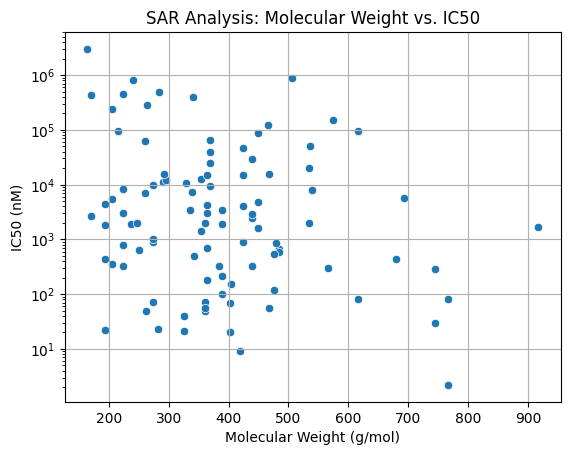

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

sns.scatterplot(x="MolWt", y="ic50_nm", data=df)
plt.title("SAR Analysis: Molecular Weight vs. IC50")
plt.xlabel("Molecular Weight (g/mol)")
plt.ylabel("IC50 (nM)")
plt.yscale("log")
plt.grid(True)
plt.show()

  File "C:\Users\NCT\anaconda3\envs\py311_tf\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\NCT\anaconda3\envs\py311_tf\Lib\subprocess.py", line 546, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\NCT\anaconda3\envs\py311_tf\Lib\subprocess.py", line 1022, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\NCT\anaconda3\envs\py311_tf\Lib\subprocess.py", line 1491, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


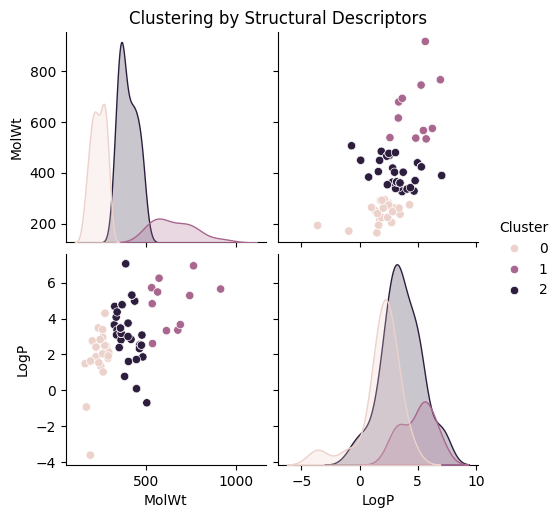

In [4]:
from sklearn.cluster import KMeans

X = df[["MolWt", "LogP", "NumHDonors", "NumHAcceptors"]]
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

sns.pairplot(df, hue="Cluster", vars=["MolWt", "LogP"])
plt.suptitle("Clustering by Structural Descriptors", y=1.02)
plt.show()


In [5]:
output_path = os.path.join(base_path, "data", "T8_sar_descriptors.csv")
df.to_csv(output_path, index=False)